In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import itertools

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
# import jax.random as random
# from jax import vmap

In [3]:
# from resource_environment import Bandit_Resource_Environment
from decay_and_recovery_environment import DandR_Environment

In [92]:
npr.seed(2)

In [93]:
npr.normal(loc=0.65,scale=0.15,size=10)

array([0.58748632, 0.64155998, 0.32957059, 0.89604062, 0.38098466,
       0.5237379 , 0.72543221, 0.46320679, 0.49130717, 0.51364886])

In [19]:
# env = Bandit_Resource_Environment(random_state=1234,num_users=1000,bin_values=[1.0,1.0,1.0],tot_init_items=300,num_bins=3)
env = DandR_Environment(num_arms=3,init_values=[0.65,0.45,0.55],decay_rate=0.2,recovery_rate=0.1)

In [21]:
env.batch[:5]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2, 1],
 [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2, 0],
 [2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0, 1],
 [0.0, 3.0, 1.0, 0.3333333333333333, 0.0, 0.6666666666666666, 2, 0],
 [1.0, 4.0, 0.0, 0.25, 0.0, 0.75, 0, 0]]

In [22]:
env.fit_BLR(init=True)

/Users/taylor/Research/ML4H/nonstationary_contextual_bandits/decay_and_recovery_environment.py:76: RuntimeWarning: overflow encountered in exp
  return self.q * (w - self.m) + (-1) * np.array([y[j] *  X[j] / (1. + np.exp(y[j] * w.dot(X[j]))) for j in range(y.shape[0])]).sum(axis=0)


In [39]:
test_idx = npr.choice(np.arange(len(env.batch)))
X_test = env.batch[test_idx][:6]
# X_test = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
X_test, env.batch[test_idx][-2:]

([1.0, 0.0, 6.0, 0.28, 0.34, 0.38], [0, 0])

In [40]:
probs = env.predict_arms(X_test)
probs

array([0.33340769, 0.33318463, 0.33340768])

In [41]:
np.argmax(probs)

0

In [42]:
env.arm_probs

array([0.65, 0.45, 0.55])

In [16]:
env.round

0

In [47]:
cntxt = np.copy(env.context)
hcntxt = np.copy(env.hist_context)

In [48]:
np.hstack([cntxt,hcntxt])

array([0.  , 0.  , 0.  , 0.38, 0.32, 0.3 ])

In [49]:
[*cntxt,*hcntxt]

[0.0, 0.0, 0.0, 0.38, 0.32, 0.3]

In [46]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
print(timestr)

20191230-113510


In [104]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_50fitfreq_fastdecay_fastrecovery_20191230-161456.npy')
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_fastdecay_fastrecovery_20191230-161856.npy')

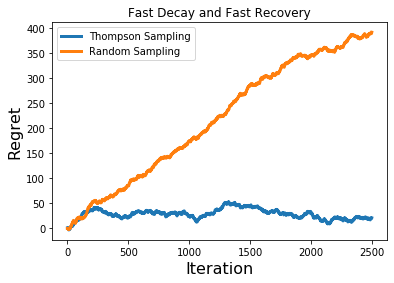

In [107]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Fast Decay and Fast Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()


In [ ]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_100fitfreq_fastdecay_slowrecovery_
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_fastdecay_slowrecovery_

In [ ]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Fast Decay and Slow Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()

In [ ]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_100fitfreq_slowdecay_slowrecovery
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_slowdecay_slowrecovery

In [ ]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Slow Decay and Slow Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()

In [ ]:
rand_decay = np.load('regrets/regret_decay_random_3arms_2500iters_100fitfreq_slowdecay_fastrecovery
ts_decay = np.load('regrets/regret_decay_ts_bayes_3arms_2500iters_100fitfreq_slowdecay_fastrecovery

In [ ]:
plt.figure()
plt.plot(ts_decay,label='Thompson Sampling',lw=3)
plt.plot(rand_decay,label='Random Sampling',lw=3)
# plt.plot(np.arange(2500),np.arange(2500),'k:')
plt.title("Slow Decay and Fast Recovery")
plt.ylabel("Regret",fontsize=16)
plt.xlabel("Iteration",fontsize=16)
plt.legend()
plt.show()

In [103]:
np.mean(rand_decay)

-0.0096

In [43]:
from datetime import date
today = date.today()
# dd/mm/YY
d1 = today.strftime("%d/%m/%Y")
print("d1 =", d1)
# Textual month, day and year	
d2 = today.strftime("%B %d, %Y")
print("d2 =", d2)
# mm/dd/y
d3 = today.strftime("%m/%d/%y")
print("d3 =", d3)
# Month abbreviation, day and year	
d4 = today.strftime("%b-%d-%Y")
print("d4 =", d4)

d1 = 30/12/2019
d2 = December 30, 2019
d3 = 12/30/19
d4 = Dec-30-2019


In [65]:
batch = env.initialize_batch_of_data(num_iters=200,num_pulls_per_user=3)

In [66]:
env.resources_avail

array([47., 30.,  0.])

In [67]:
env.init_bins

array([133., 102.,  65.])

In [68]:
rng_trainers = random.split(random.PRNGKey(1234),50)
rng_testers = random.split(random.PRNGKey(2334),5000)

In [69]:
env.fit_bnn_predictor(rng_trainers[24])

sample: 100%|██████████| 3000/3000 [01:19<00:00, 37.86it/s, 31 steps of size 3.39e-03. acc. prob=0.83]



MCMC elapsed time: 80.86327409744263


sample: 100%|██████████| 3000/3000 [01:15<00:00, 39.57it/s, 31 steps of size 5.25e-03. acc. prob=0.82]



MCMC elapsed time: 77.36503052711487


sample: 100%|██████████| 3000/3000 [01:24<00:00, 35.40it/s, 31 steps of size 1.14e-04. acc. prob=0.77]



MCMC elapsed time: 86.47825884819031


In [70]:
env.restock(fill_type=0.45)

In [71]:
pred_ii = -1

In [81]:
usr_idx, usr_cntxt = env.sample_new_user()

In [73]:
env.resources_avail

array([86., 62., 29.])

In [82]:
X_test = np.insert(np.copy(env.resources_avail),0,usr_cntxt)[np.newaxis,:]
# X_test = np.insert(np.copy([0.,0.,0.]),0,usr_cntxt)[np.newaxis,:]
X_test

array([[ 0.95659096, 86.        , 62.        , 29.        ]])

In [83]:
pred_ii += 1
value_preds = env.predict_values(rng_testers[pred_ii],X_test)
value_preds

[DeviceArray([[0.1968728]], dtype=float32),
 DeviceArray([[0.16754149]], dtype=float32),
 DeviceArray([[-0.43080777]], dtype=float32)]

In [84]:
print(np.argmax(value_preds))
print(env.user_prefs[usr_idx])

0
[0.09315989 0.05697103 0.8498691 ]


In [85]:
[1.0]*3

[1.0, 1.0, 1.0]

In [86]:
len(env.batch)

[autoreload of resource_environment failed: Traceback (most recent call last):
  File "/h/tkillian/envs/DEenv/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/h/tkillian/envs/DEenv/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/pkgs/anaconda37/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/pkgs/anaconda37/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/h/tkillian/Research/nonstationary_contextual_bandits/resource_environment.py", li

1200

In [87]:
type(env.batch)

list

In [88]:
X_test

array([[ 0.95659096, 86.        , 62.        , 29.        ]])

In [89]:
env.batch.append(np.array([usr_idx,usr_cntxt,np.copy(env.resources_avail),np.argmax(value_preds),0.]))

In [90]:
len(env.batch)

1201

In [94]:
(env.resources_avail > 0).astype(int)

array([1, 1, 1])

In [99]:
env.user_prefs[usr_idx]*(env.resources_avail>0).astype(int)

DeviceArray([0.09315989, 0.        , 0.8498691 ], dtype=float32)

In [98]:
env.resources_avail[1] = 0